Environment validation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
print("numpy version:", np.__version__)
print("matplotlib version:", plt.matplotlib.__version__)

numpy version: 2.0.2
matplotlib version: 3.10.0


simple test plot


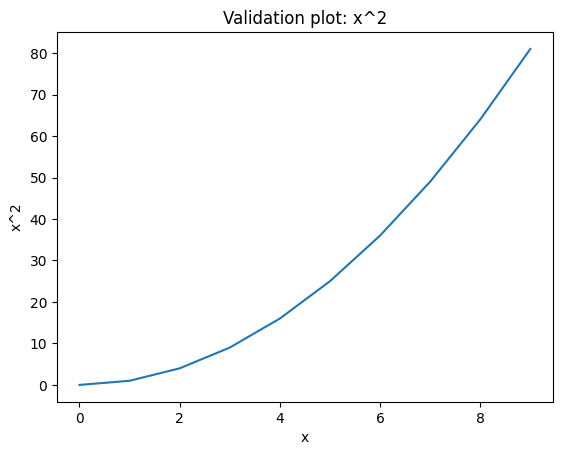

In [2]:
x = np.arange(0,10)
y = x**2
plt.figure()
plt.plot(x, y)
plt.title("Validation plot: x^2")
plt.xlabel("x")
plt.ylabel("x^2")
plt.show()



Problem 1 — Scheduling TV Commercials (Greedy job sequencing)

In [3]:
# Greedy Job Sequencing (maximize revenue)
from typing import List, Tuple

def schedule_ads(ads: List[Tuple[str,int,int]]) -> Tuple[List[Tuple[str,int,int]], int]:
    """
    ads: list of tuples (id, deadline_slot (1-indexed), profit)
    returns: scheduled ads and total profit
    Greedy: sort by profit descending and try to place each ad in latest free slot <= deadline
    """
    if not ads:
        return [], 0
    # find max deadline to size the schedule
    max_deadline = max(d for (_id, d, p) in ads)
    # sort ads by profit descending
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)
    slots = [None] * (max_deadline + 1)  # 1..max_deadline
    total_profit = 0
    selected = []
    for ad in ads_sorted:
        ad_id, deadline, profit = ad
        # try to place in the latest available slot <= deadline
        for t in range(min(max_deadline, deadline), 0, -1):
            if slots[t] is None:
                slots[t] = ad
                selected.append(ad)
                total_profit += profit
                break
    return selected, total_profit

example usage

In [4]:
ads = [("A",2,100), ("B",1,19), ("C",2,27), ("D",1,25), ("E",3,15)]
selected, profit = schedule_ads(ads)
print("Selected ads:", selected)
print("Total profit:", profit)

Selected ads: [('A', 2, 100), ('C', 2, 27), ('E', 3, 15)]
Total profit: 142


Visualization (ads vs revenue):

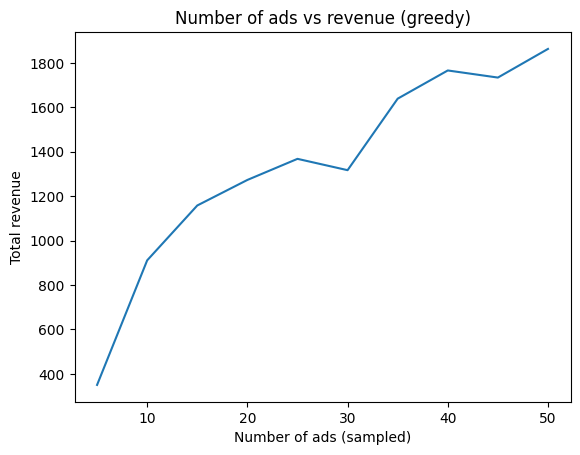

In [5]:
import matplotlib.pyplot as plt
# simulate different numbers of ads and show total profit growth
def simulate_ads_growth(n_max=50):
    import random
    profits = []
    counts = list(range(5, n_max+1, 5))
    for n in counts:
        ads = []
        for i in range(n):
            # random deadline between 1 and min(10, n)
            dl = random.randint(1, min(10, n))
            p = random.randint(5, 200)
            ads.append((f"ad{i}", dl, p))
        _, tot = schedule_ads(ads)
        profits.append(tot)
    return counts, profits

counts, profits = simulate_ads_growth(50)
plt.figure()
plt.plot(counts, profits)
plt.xlabel("Number of ads (sampled)")
plt.ylabel("Total revenue")
plt.title("Number of ads vs revenue (greedy)")
plt.show()


Time/space analysis to write in notebook: Sorting O(n log n), scheduling O(n * D) with D=max_deadline; space O(D).

Problem 2 — 0/1 Knapsack (Dynamic Programming, bottom-up)

In [6]:
def knapsack_01(values, weights, capacity):
    n = len(values)
    # dp[i][w] = max value using first i items with capacity w
    dp = [[0]*(capacity+1) for _ in range(n+1)]
    for i in range(1, n+1):
        for w in range(0, capacity+1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], values[i-1] + dp[i-1][w-weights[i-1]])
            else:
                dp[i][w] = dp[i-1][w]
    # reconstruct selected items
    res_val = dp[n][capacity]
    w = capacity
    selected = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected.append(i-1)  # index of item
            w -= weights[i-1]
    selected.reverse()
    return res_val, selected

Example Usage

In [7]:
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
best_val, sel = knapsack_01(values, weights, capacity)
print("Max profit:", best_val)
print("Selected item indices:", sel)


Max profit: 220
Selected item indices: [1, 2]


Visualization (profit vs budget):

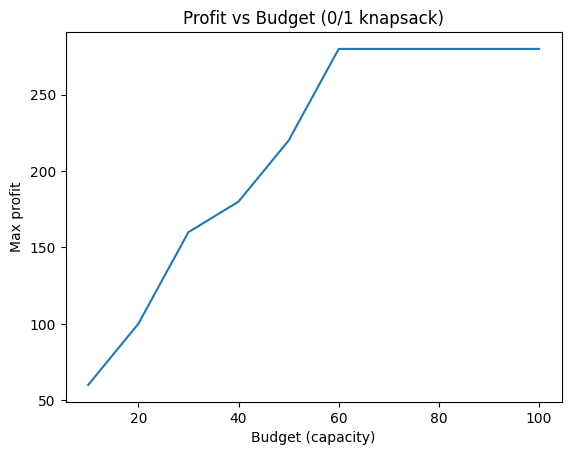

In [8]:
import matplotlib.pyplot as plt
capacities = list(range(10, 101, 10))
profits = []
for cap in capacities:
    val, _ = knapsack_01(values, weights, cap)
    profits.append(val)
plt.figure()
plt.plot(capacities, profits)
plt.xlabel("Budget (capacity)")
plt.ylabel("Max profit")
plt.title("Profit vs Budget (0/1 knapsack)")
plt.show()


Complexity: O(n * capacity) time, O(n * capacity) space (can optimize to O(capacity)).

Problem 3 — Sudoku solver (Backtracking)

In [10]:

def is_valid(grid, row, col, val):
    # check row
    if any(grid[row][c] == val for c in range(9)):
        return False
    # check column
    if any(grid[r][col] == val for r in range(9)):
        return False
    # check 3x3
    sr, sc = 3*(row//3), 3*(col//3)
    for r in range(sr, sr+3):
        for c in range(sc, sc+3):
            if grid[r][c] == val:
                return False
    return True

def find_empty(grid):
    for r in range(9):
        for c in range(9):
            if grid[r][c] == 0:
                return r, c
    return None

def solve_sudoku(grid):
    empty = find_empty(grid)
    if not empty:
        return True
    r, c = empty
    for v in range(1, 10):
        if is_valid(grid, r, c, v):
            grid[r][c] = v
            if solve_sudoku(grid):
                return True
            grid[r][c] = 0
    return False

sample puzzle (0 = empty)

In [11]:
puzzle = [
 [5,3,0,0,7,0,0,0,0],
 [6,0,0,1,9,5,0,0,0],
 [0,9,8,0,0,0,0,6,0],
 [8,0,0,0,6,0,0,0,3],
 [4,0,0,8,0,3,0,0,1],
 [7,0,0,0,2,0,0,0,6],
 [0,6,0,0,0,0,2,8,0],
 [0,0,0,4,1,9,0,0,5],
 [0,0,0,0,8,0,0,7,9]
]
import copy
g = copy.deepcopy(puzzle)
if solve_sudoku(g):
    print("Solved Sudoku:")
    for row in g:
        print(row)
else:
    print("No solution found.")


Solved Sudoku:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


Problem 4 — Password cracking (brute-force, naive)

In [12]:
# Problem 4: naive brute-force password cracking
import itertools, time

def brute_force_password(target, charset, max_len=4):
    attempts = 0
    start = time.time()
    for length in range(1, max_len+1):
        for tup in itertools.product(charset, repeat=length):
            attempts += 1
            cand = ''.join(tup)
            if cand == target:
                duration = time.time() - start
                return cand, attempts, duration
    return None, attempts, time.time() - start



Example (short password)

In [13]:
target = "ab1"
charset = "ab12"
found, attempts, duration = brute_force_password(target, charset, max_len=4)
print("Found:", found, "Attempts:", attempts, "Time(s):", duration)


Found: ab1 Attempts: 27 Time(s): 1.9788742065429688e-05


Plot (time vs password length) — simulated or measured for short lengths:

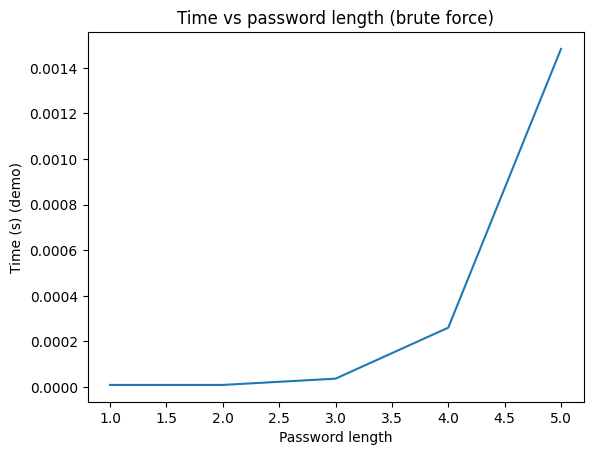

In [14]:
import matplotlib.pyplot as plt
import time
def measure_time_for_length(charset, length, trials=1):
    # measure time to search for a target of that length (worst-case)
    target = charset[-1] * length
    t0 = time.time()
    brute_force_password(target, charset, max_len=length)
    return time.time() - t0

charset = "abc123"
lengths = list(range(1,6))
times = []
for L in lengths:
    t = measure_time_for_length(charset, L)
    times.append(t)
plt.figure()
plt.plot(lengths, times)
plt.xlabel("Password length")
plt.ylabel("Time (s) (demo)")
plt.title("Time vs password length (brute force)")
plt.show()


Complexity: O(|charset|^L) time; memory negligible.

Time measurement (simple):

In [15]:
import time
t0 = time.time()
# run function, e.g. schedule_ads(ads)
t1 = time.time()
print("Elapsed:", t1 - t0)


Elapsed: 6.151199340820312e-05
